#  **Mumbai Weather Prediction**

AIML B3

Rudraksh Kavishwar 23070126511

Saee Hudli 23070126512


# **Introduction**

A weather forecast is simply a scientific estimate of future weather condition.
Weather condition is the state of the atmosphere at a given time expressed in terms of the most significant weather variables.

The significant weather variables being forecast differ from place to place.Accurate weather predictions have a significant impact on various aspects of society, including public safety, agriculture, transportation, energy management, environmental protection, and economic planning.

Weather prediction is critical for planning and decision-making in many aspects of modern life. It combines the knowledge of meteorology, mathematics, and data science to provide us with valuable insights into our ever-changing atmosphere.




## **Getting Notebook ready**

**Importing essential libraries**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
raindata = pd.read_csv('/content/mumbai_weather.csv')

# **Data Processing**

Data processing in a weather prediction database is a crucial step in collecting, organizing, and preparing data for use in weather forecasting models and applications. The quality of the data and the effectiveness of processing methods significantly impact the accuracy of weather predictions.

Effective data processing in a weather prediction database is essential for generating accurate and reliable weather forecasts. It requires a combination of domain expertise, data management best practices, and advanced computational techniques to ensure that the data is well-prepared for use in weather prediction models and applications.

In [37]:
raindata.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'sealevelpressure', 'winddir',
       'solarradiation', 'windspeed', 'precipprob', 'preciptype'],
      dtype='object')

Number of rows and  columns

In [39]:
raindata.shape

(1781, 10)

In [56]:
raindata.isnull().sum()

datetime            0
temp                0
dew                 0
humidity            0
sealevelpressure    0
winddir             0
solarradiation      0
windspeed           0
precipprob          0
preciptype          0
dtype: int64

In [40]:
print('Number of features: {}'.format(raindata.shape[1]))
print('Missing values: {}\n'.format(raindata.isnull().sum().sum()))

Number of features: 10
Missing values: 0



In [41]:
raindata.dtypes

datetime             object
temp                float64
dew                 float64
humidity            float64
sealevelpressure    float64
winddir             float64
solarradiation      float64
windspeed           float64
precipprob            int64
preciptype            int64
dtype: object

In [42]:
raindata.head()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0


In [43]:
raindata.tail()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0
1780,15-11-2020,29.7,22.3,65.4,1010.7,150.5,225.9,17.1,0,0


In [44]:
raindata.drop(["datetime", "precipprob"], axis = 1).describe()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,28.342560,21.644975,69.565974,1008.878046,201.304267,228.169175,22.309882,0.456485
std,1.960027,4.532065,14.533809,3.706157,47.075559,57.034865,6.360669,0.498243
min,20.200000,5.000000,28.600000,994.100000,65.600000,52.800000,9.400000,0.000000
25%,27.200000,18.100000,58.000000,1006.200000,163.700000,194.600000,18.400000,0.000000
50%,28.500000,23.800000,71.600000,1009.100000,204.500000,232.300000,22.300000,0.000000
75%,29.700000,25.300000,81.200000,1011.800000,240.900000,274.400000,24.600000,1.000000
max,32.800000,27.500000,98.200000,1017.400000,316.000000,330.900000,128.100000,1.000000


In [45]:
raindata.iloc[:,1:5]

,temp,dew,humidity,sealevelpressure
0,28.4,11.9,37.8,1016.4
1,26.8,13.0,44.8,1017.2
2,25.5,14.6,52.8,1015.7
3,26.4,13.1,46.6,1015.3
4,27.1,13.5,44.9,1014.4
...,...,...,...,...
1776,27.4,12.2,41.5,1011.8
1777,28.0,13.0,40.9,1012.6
1778,28.4,18.7,56.9,1011.9
1779,29.5,20.9,61.3,1010.2


# Exploratotary Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in the process of working with weather prediction databases. EDA involves the initial investigation and examination of the data to gain a better understanding of its characteristics, identify patterns, anomalies, and potential issues, and inform subsequent data processing and modeling



<Axes: >

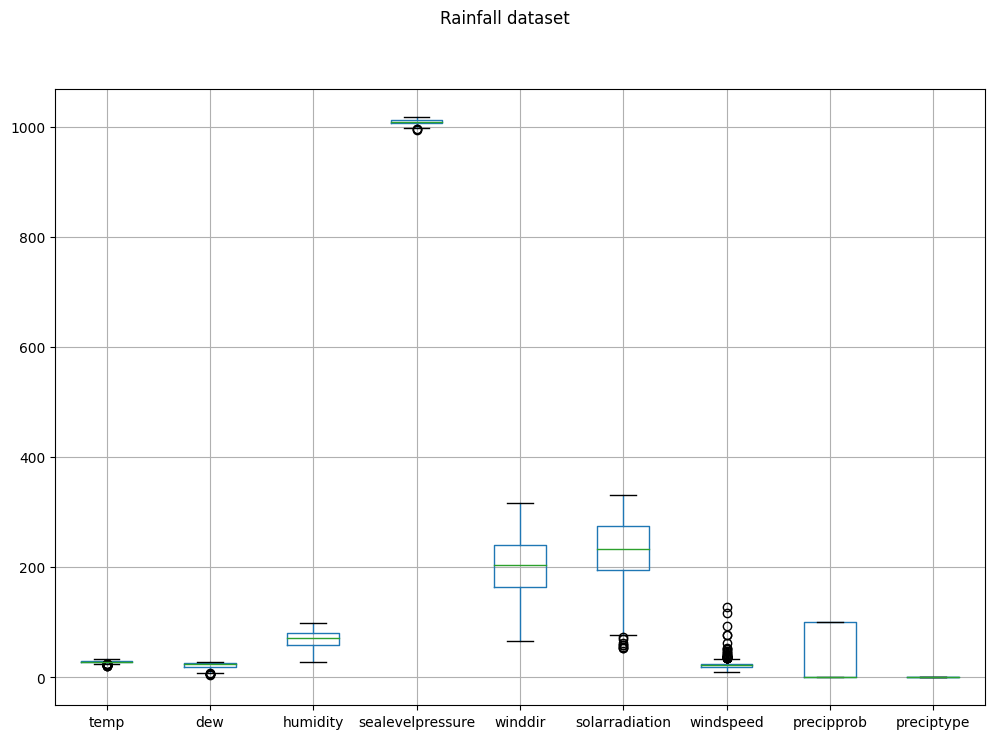

In [46]:
plt.figure(figsize=(12,8))
plt.suptitle("Rainfall dataset")
raindata.boxplot()

<Axes: ylabel='Frequency'>

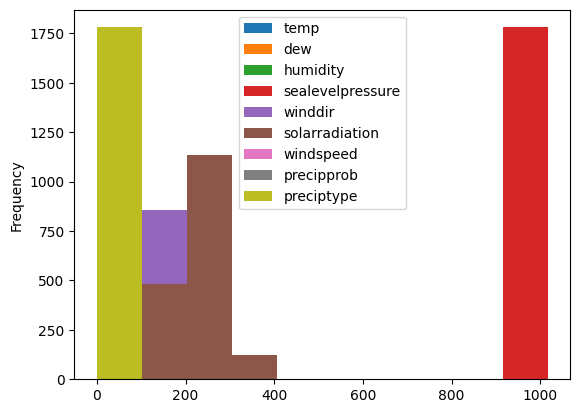

In [47]:
raindata.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

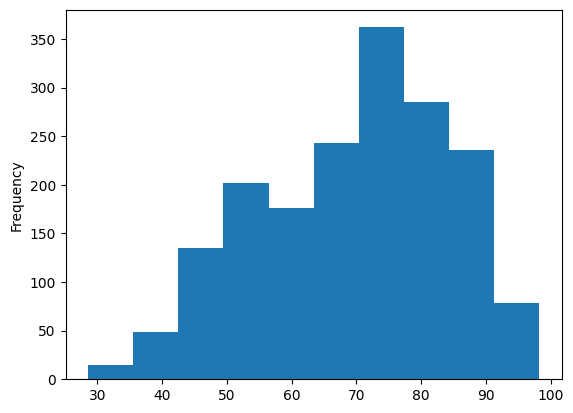

In [48]:
raindata["humidity"].plot(kind = "hist" )

<Axes: ylabel='Frequency'>

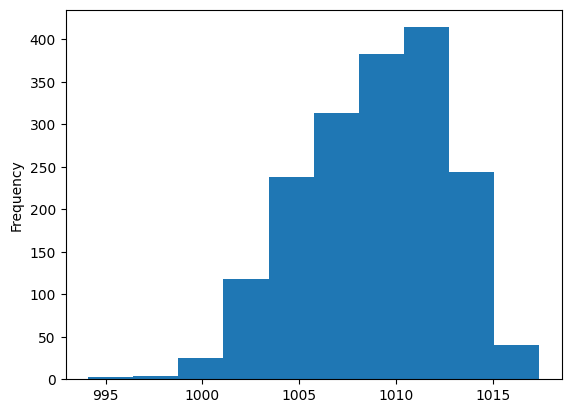

In [49]:
raindata["sealevelpressure"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

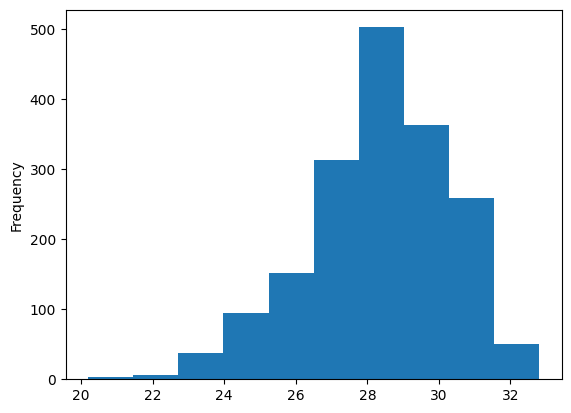

In [50]:
raindata["temp"].plot(kind = "hist" )

<Axes: xlabel='winddir', ylabel='windspeed'>

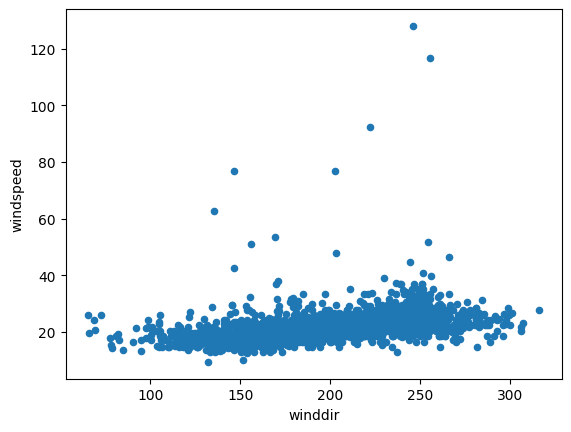

In [51]:
raindata.plot(kind = "scatter", x = 'winddir', y = 'windspeed')

The code is intended to assist seeing, on a heatmap, the correlation between the columns in the DataFrame raindata1, which will facilitate understanding of the relationships between the various columns. Positive correlations are usually displayed in dark blue color, while negative correlations are displayed in a light color. The colors in the heatmap represent the strength and direction of the correlations.

<Axes: >

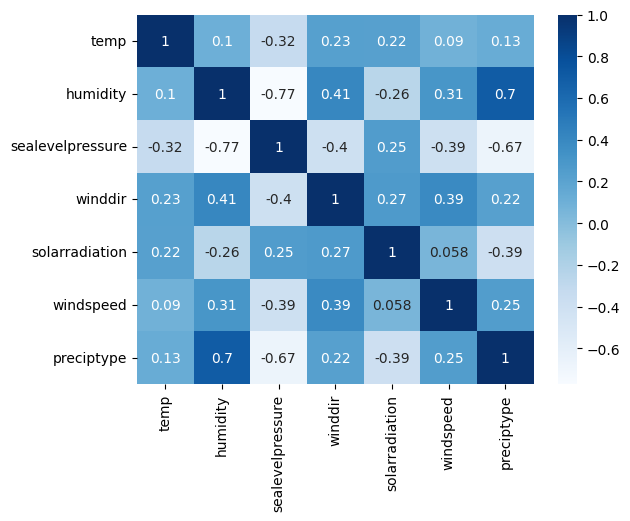

In [52]:
raindata1 = raindata.drop(["datetime", "precipprob", "dew"], axis = 1)
corMatrix = pd.DataFrame.corr(raindata1)
corMatrix
sns.heatmap(corMatrix, annot = True, cmap = "Blues")

<Axes: >

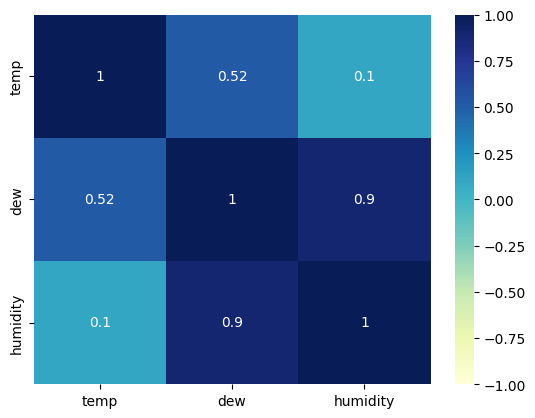

In [53]:
corr_matrix = raindata.iloc[:,1:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

<ipython-input-54-701e31de0477>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fig_data[feature_name[i]])
<ipython-input-54-701e31de0477>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fig_data[feature_name[i]])
<ipython-input-54-701e31de0477>:6: UserWarning: 

`distplot` is a deprecated fun

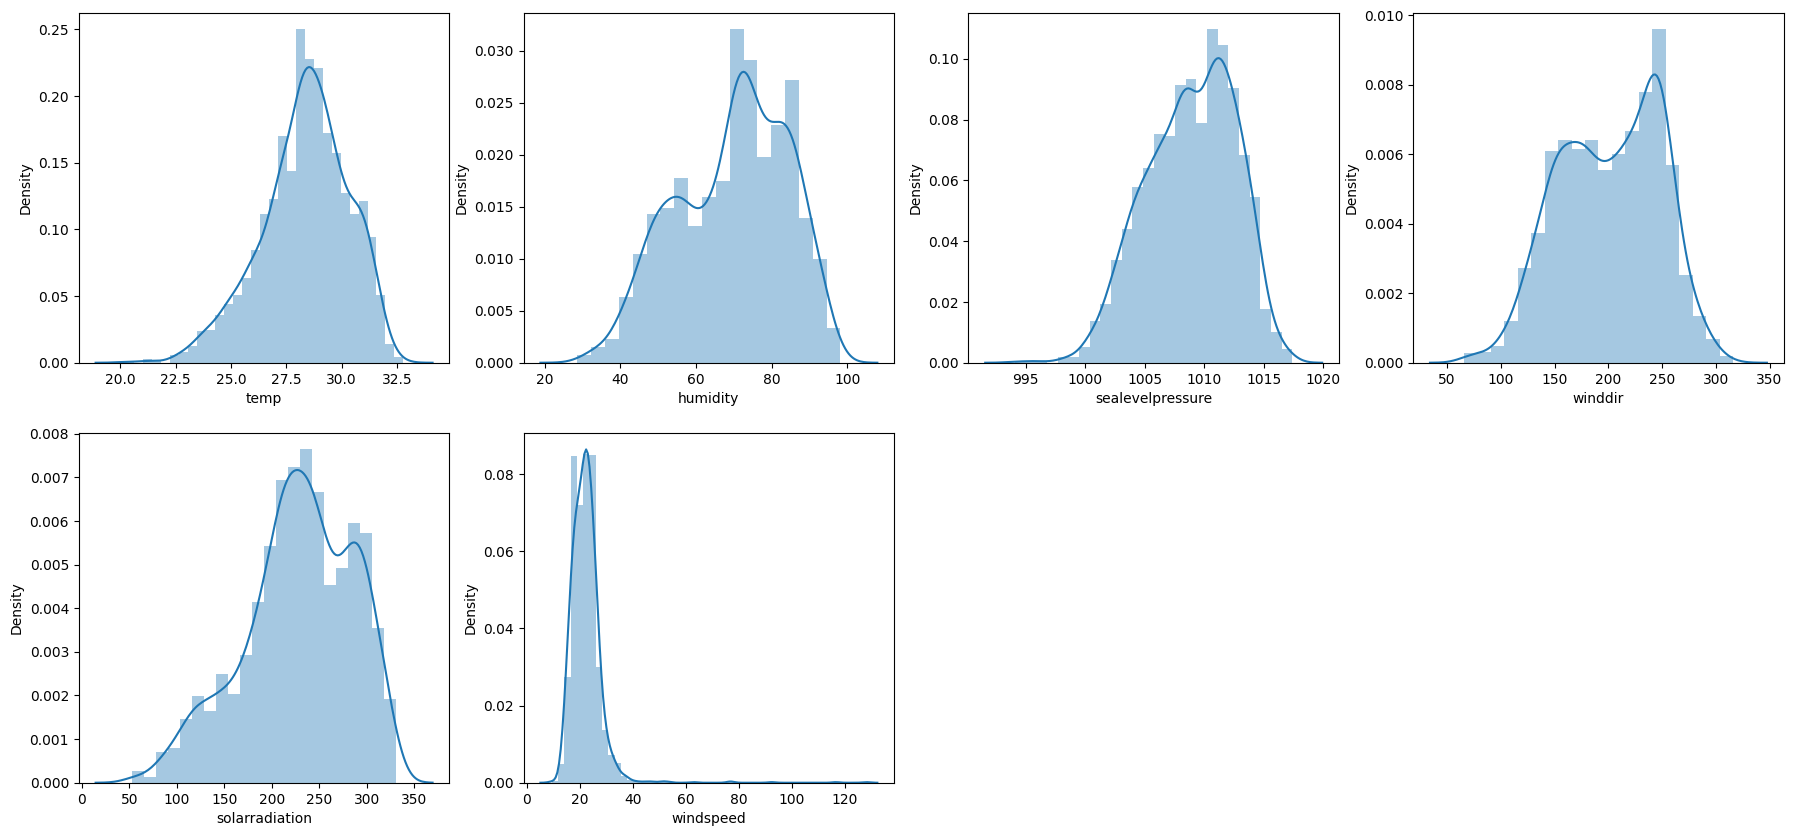

In [54]:
fig_data = raindata1.drop("preciptype", axis = 1)
plt.figure(figsize= (22,10))
feature_name = list(["temp", "humidity", "sealevelpressure", "winddir", "solarradiation", "windspeed"])
for i in range(6):
    plt.subplot(2,4,i+1)
    sns.distplot(fig_data[feature_name[i]])

# Using KNN algorithm to check if model accuracy improves

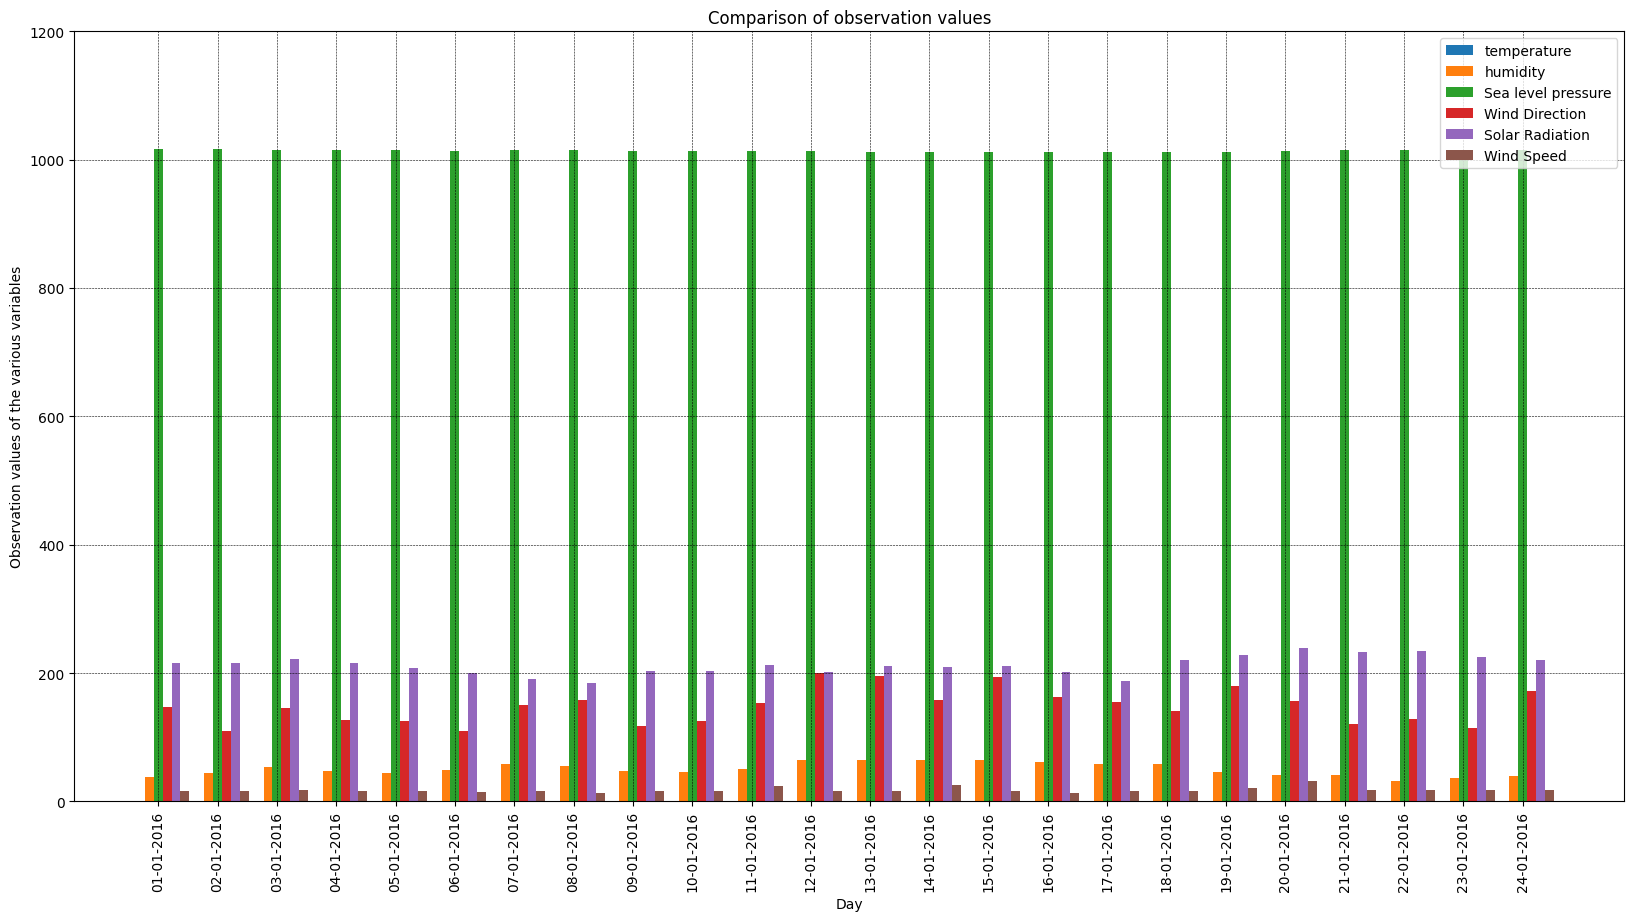

In [55]:
day = raindata["datetime"].head(24)
temperature = raindata["temp"].head(24)
humidity = raindata["humidity"].head(24)
pressure = raindata["sealevelpressure"].head(24)
winddirection = raindata["winddir"].head(24)
radiation = raindata["solarradiation"].head(24)
speed = raindata["windspeed"].head(24)
fig, ax = plt.subplots(figsize =(20, 10))
x_axis = np.arange(len(day))
width = 0.15
plt.bar(x_axis - (1*width), temperature, width = width,label = "temperature")
plt.bar(x_axis - width, humidity, width = width, label = "humidity")
plt.bar(x_axis, pressure, width = width, label = "Sea level pressure")
plt.bar(x_axis+width, winddirection, width = width, label = "Wind Direction")
plt.bar(x_axis+(2*width), radiation, width = width, label = "Solar Radiation")
plt.bar(x_axis+(3*width), speed, width = width, label = "Wind Speed")
plt.ylim(0,1200)
plt.xticks(ticks = x_axis, labels = day, rotation = "vertical")
plt.title("Comparison of observation values")
plt.xlabel("Day")
plt.ylabel("Observation values of the various variables")
plt.grid(color = "black", linestyle = "--", linewidth = 0.4)
plt.legend()